# Convergence Velocities

This notebook illustrates convergence velocity calculation using pygplates.

The idea is that if we want to analyse the relative velocity across a plate boundary (typically a subduction zone in the case of plate convergence), then we can extract the values based on the rotation model. 

The examples use the convergence between Farallon and South America.  
(Spot the deliberate flaw in this example)

There are two examples which are largely similar, but produce different styles of plot to shows the output.

### Example #1

Make plots of convergence velocity and direction, using the 'magnitude-azimuth' representation of velocity


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


time = 0.00 Ma, magnitude = 8.02, azimuth = 77.68
time = 5.00 Ma, magnitude = 7.98, azimuth = 78.66
time = 10.00 Ma, magnitude = 9.53, azimuth = 87.77
time = 15.00 Ma, magnitude = 9.88, azimuth = 89.29
time = 20.00 Ma, magnitude = 9.68, azimuth = 83.38
time = 25.00 Ma, magnitude = 10.08, azimuth = 68.84
time = 30.00 Ma, magnitude = 7.99, azimuth = 68.47
time = 35.00 Ma, magnitude = 4.65, azimuth = 74.45
time = 40.00 Ma, magnitude = 9.50, azimuth = 81.85
time = 45.00 Ma, magnitude = 8.54, azimuth = 89.50
time = 50.00 Ma, magnitude = 7.38, azimuth = 108.65
time = 55.00 Ma, magnitude = 1.94, azimuth = 87.67
time = 60.00 Ma, magnitude = 2.51, azimuth = 47.07
time = 65.00 Ma, magnitude = 5.52, azimuth = 47.76
time = 70.00 Ma, magnitude = 5.98, azimuth = 51.39
time = 75.00 Ma, magnitude = 3.27, azimuth = 9.19
time = 80.00 Ma, magnitude = 4.24, azimuth = 46.54
time = 85.00 Ma, magnitude = 12.29, azimuth = 77.85
time = 90.00 Ma, magnitude = 10.21, azimuth = 69.13
time = 95.00 Ma, magnitude = 9

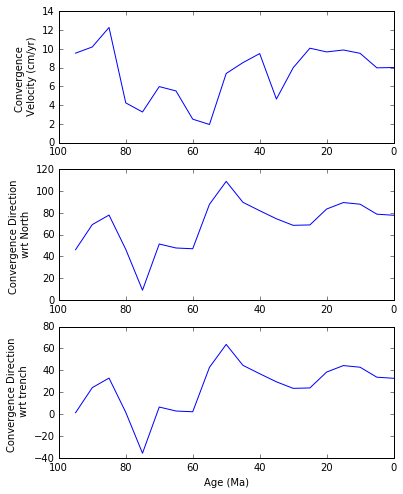

In [1]:
import pygplates
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpltools import color
import matplotlib as mpl

%matplotlib inline

# Rotation File
rotation_filename = '../Data/Seton_etal_ESR2012_2012.1.rot'

# Point at which to calculate convergence (assuming over-riding plate is fixed)
point_longitude = -71
point_latitude = -20

# Plate pair sharing convergent boundary. fixed plate --> over-riding plate
fixed_plate = 201
moving_plate = 902

# Time range and time increment for convergence velocity calculation
min_time = 0.
max_time = 100.
time_step = 5.

# For this example, we'll assume trench strike is 315 - with a value for trench strike, we can 
# calculate convergence obliquity, trench-othogonal convergence
trench_strike = -45.

####### END OF USER INPUT
time_array = np.arange(min_time,max_time,time_step)

rotation_model = pygplates.RotationModel(rotation_filename)

# use coordinates to define a pygplates point at which to evaluate velocity
velocity_point = pygplates.PointOnSphere((point_latitude,point_longitude))

# Make empty lists to store the velocity vector values
velocity_magnitude = []
velocity_azimuth = []

for time in time_array:
    # Get the rotation for current time interval, and the feature's reconstruction plate ID.
    equivalent_stage_rotation = rotation_model.get_rotation(
        time, moving_plate, time+time_step, fixed_plate)

    # Calculate a velocity for each reconstructed point over the 1My time interval.
    velocity_vector = pygplates.calculate_velocities(
        velocity_point,
        equivalent_stage_rotation,
        time_step,
        pygplates.VelocityUnits.cms_per_yr)

    velocity_magnitude_azimuth = pygplates.LocalCartesian.convert_from_geocentric_to_magnitude_azimuth_inclination(
                            velocity_point,
                            velocity_vector)

    #print velocity_vector
    print 'time = %0.2f Ma, magnitude = %0.2f, azimuth = %0.2f' % \
        (time, velocity_magnitude_azimuth[0][0], np.degrees(velocity_magnitude_azimuth[0][1]))
    velocity_magnitude.append(velocity_magnitude_azimuth[0][0])
    velocity_azimuth.append(np.degrees(velocity_magnitude_azimuth[0][1]))


plt.figure(figsize=(6,8))
plt.subplot(311)
plt.plot(time_array,velocity_magnitude)
plt.xlim([100,0])
plt.ylabel('Convergence \n Velocity (cm/yr)')
plt.subplot(312)
plt.plot(time_array,velocity_azimuth)
plt.xlim([100,0])
plt.ylabel('Convergence Direction \n wrt North')
plt.subplot(313)
plt.plot(time_array,np.array(velocity_azimuth)-trench_strike-90)
plt.xlim([100,0])
plt.ylabel('Convergence Direction \n wrt trench')
plt.xlabel('Age (Ma)')
plt.show()



### Example #2

Plot the convergence vectors as arrows with length and direction based on the relative velocity vector for separate 5 Myr intervals (the different colours representing different intervals). This example uses the 'north-east' representation of velocities.


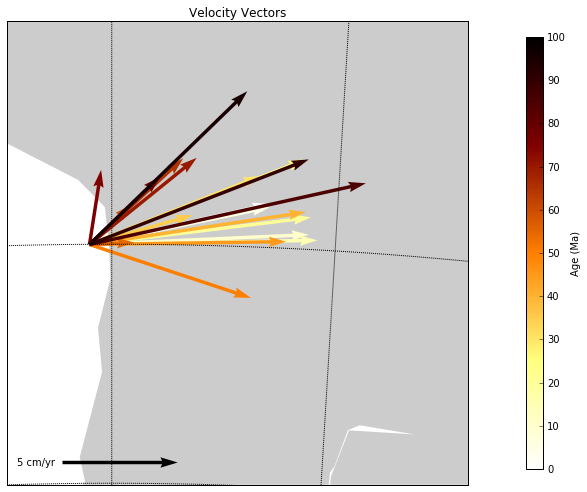

In [2]:
# Make empty lists to store the velocity vector components (north and east)
velocity_n = []
velocity_e = []

for time in time_array:
    # Get the rotation for current time interval, and the feature's reconstruction plate ID.
    equivalent_stage_rotation = rotation_model.get_rotation(
        time, moving_plate, time+time_step, fixed_plate)

    # Calculate a velocity for each reconstructed point over the 1My time interval.
    velocity_vector = pygplates.calculate_velocities(
        velocity_point,
        equivalent_stage_rotation,
        time_step,
        pygplates.VelocityUnits.cms_per_yr)

    velocity_n_e = pygplates.LocalCartesian.convert_from_geocentric_to_north_east_down(
                            velocity_point,
                            velocity_vector)

    velocity_n.append(velocity_n_e[0].get_y())
    velocity_e.append(velocity_n_e[0].get_x())
    

# create figure, add axes
fig1 = plt.figure(figsize=(8,10))
ax = fig1.add_axes([0,0,0.8,1.0])
ax_cbr1 = fig1.add_axes([0.9,0.2,0.03,0.6])

m = Basemap(llcrnrlon=-75, llcrnrlat=-30., urcrnrlon=-55, urcrnrlat=-10,
            projection='lcc', lat_1=-10., lat_2=-30., lat_0=-20, lon_0=-70.,
            ax=ax)
m.fillcontinents(zorder=1)
m.drawparallels(np.arange(-80.,90,10.))
m.drawmeridians(np.arange(0.,360.,10.))

for vn,ve,age in zip(velocity_n,velocity_e,time_array):
    uproj,vproj,xx,yy = \
    m.rotate_vector(np.asarray(vn),
                    np.asarray(ve),
                    np.asarray(point_longitude),
                    np.asarray(point_latitude),returnxy=True)
    color = plt.cm.afmhot_r(age/max_time)
    Q = m.quiver(xx,yy,uproj,vproj,scale=20,zorder=2,color=color)

# make quiver key.
qk = plt.quiverkey(Q, 0.12, 0.05, 5, '5 cm/yr', labelpos='W',zorder=2,color='k')

# add colorbars for LIP Age and seismic velocity
norm = mpl.colors.Normalize(vmin=0, vmax=max_time)
cb1 = mpl.colorbar.ColorbarBase(ax_cbr1, cmap=plt.cm.afmhot_r,
                                   norm=norm)
cb1.set_label('Age (Ma)')

# set plot title
ax.set_title('Velocity Vectors')
plt.show()